In [113]:
import os
import string
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords as sw

list_id_files = os.listdir('root\\T-newsgroups')
table = str.maketrans('', '', string.punctuation)
#the previous method allows me to build a table that will be used to remove
#the puntaction, where it is !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

In [114]:
dataset = {}
int_id = [int(s) for s in list_id_files]
for file in sorted(int_id) :
    with open('root\\T-newsgroups\\'+str(file)) as f:
        text = f.read()
        text = text.translate(table)
        dataset[file] = text

In [144]:
class LemmaTokenizer(object):
    def __init__(self):
        #Here the stemming operation for ex: 'dogs' -> 'dog'
        self.lemmatizer = WordNetLemmatizer()
        
    def __call__(self, document):
        lemmas = []
        for t in word_tokenize(document): 
            #word_tokenize(document) allow to make a list with all the words occurring in the document
            #punctation not excluded !!
            #t = t.translate(table)#it remove punctation
            t = t.strip()#it remove spaces before and after the characters
            lemma = self.lemmatizer.lemmatize(t)#apply the lemmatization
            lemmas.append(lemma)
        return lemmas
            
lemmaTokenizer = LemmaTokenizer()#call to the constructor
stop_words = sw.words('english')
newStopWords = ['could', 'doe', 'ha', 'might', 'must', 'need', 'sha', 'wa', 'wo', 'would',"'d", "'ll", "'re", "'s", "'ve", "nt", "n't"]
stop_words.extend(newStopWords)#expanding the stopwords

Now i need to implement the Term Frequency - Inverse Document Frequency function.
This allow me to weight tokens among documents (slide 72 Data Preprocessing)

In [198]:
vectorizer = TfidfVectorizer(tokenizer=lemmaTokenizer, lowercase=True, max_df=0.11, stop_words= stop_words)
tfidf_X = vectorizer.fit_transform(dataset.values())

Once this is done, i have a matrix that for each token has his corrisponding weight among documents,
High values means that the token(word) isn't usual
Low values means that the token is common

In [185]:
#print(tfidf_X,'\n\nShape: ' ,tfidf_X.shape)


In [143]:
#from sklearn.decomposition import TruncatedSVD

#svd = TruncatedSVD(n_components= 100, random_state=42)
#red_x = svd.fit_transform(tfidf_X)

#print(red_x)

Applying a clustering tecnique

In [199]:
from sklearn.cluster import KMeans


km = KMeans(n_clusters=5, random_state=25)
y_pred = km.fit_predict(tfidf_X)

In [16]:
#attempt to use SVD
#km2 = KMeans(n_clusters=4, random_state=40)
#svd_pred = km.fit_predict(tfidf_X)

Evaluating the result with silhouette index

In [200]:
from sklearn.metrics import silhouette_score

silh = silhouette_score(tfidf_X, y_pred)
#silh_db = silhouette_score(tfidf_X, db_pred)

print('Silhouette: ', silh)
#print('SilhouetteDB: ', silh_svd)


Silhouette:  0.0050454035175470134


Dump to file

In [201]:
import csv

def dump_to_file(filename, y_pred, dataset):
    with open(filename, mode="w", newline="") as csvfile:
        
        # Headers
        fieldnames = ['Id', 'Predicted']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for ids, cluster in zip(dataset.keys(), y_pred):
            writer.writerow({'Id': str(ids), 'Predicted': str(cluster)})

dump_to_file("result.csv", y_pred, dataset)
print("Computed Finished")

Computed Finished


In [149]:
#this function assign each document to its respective label
#that has been predicted by clustering

def separate_in_chunk(dataset, y_pred):
    data_chunk = {}
    table2 = str.maketrans('\n\t\r', '   ')
    for i in range(len(set(y_pred))):
        data_chunk[i] = []
    for document, cluster in zip(dataset.values(), y_pred):
        document = document.translate(table2)
        data_chunk[cluster].append(document)    
        
    return data_chunk    

In [202]:
chunk = separate_in_chunk(dataset, y_pred)
#print(chunk[0])

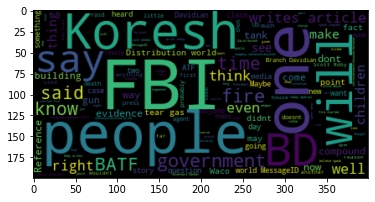

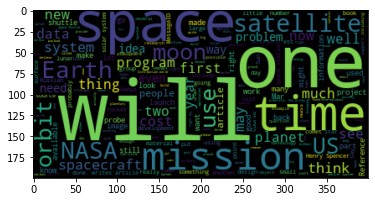

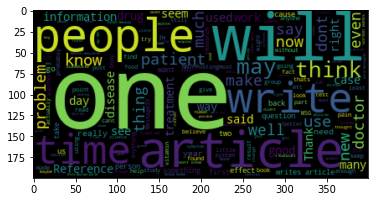

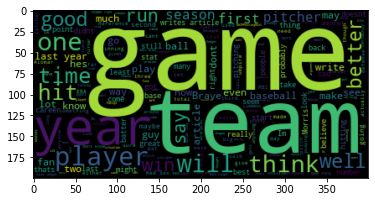

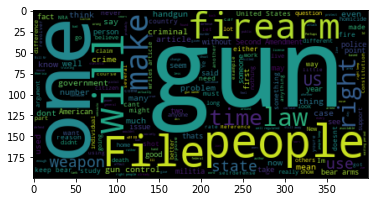

(0.0, 1.0, 0.0, 1.0)

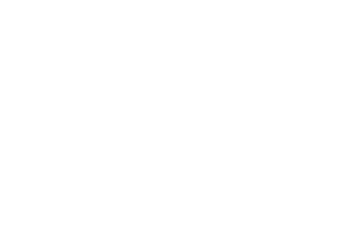

In [203]:
from os import path
from wordcloud import WordCloud

wordcloud = {}

for i in range(len(chunk)):
    wordcloud[i] = WordCloud().generate(str(chunk[i]))
    

# Generate a word cloud image
#wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
for i in range(len(wordcloud)):
    plt.imshow(wordcloud[i], interpolation='bilinear')
    plt.show()
plt.axis("off")
